# Credit Card Fraud Detection
### Recognize fraudulent credit card transactions
### 4.1 Semi-supervised learning(ML)
             KwangMyung Yu, Senior Researcher, Korea Electric Power Corporation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 30 #중요

In [2]:
color_pal = [ '#ee4035', '#3385c6', '#fed766','#eb6841', '#708090', 
	'#00a0b0', '#3b7dd8', '#fe4a49' , '#2ab7ca', '#851e3e', 
	'#2a4d69',  '#f7f7f7', '#edc951', '#54b2a9', '#ffffff', 
	'#96ceb4', '#ffeead', '#708090', '#be9b7b', '#feb2a8',
	'#58668b',  '#4f372d', '#ECD59F', '#ABD1DC', '#7E9680', 
    	'#E69D45', '#D4CFC9', '#E79796', '#C6C09C', '#dec3c3',
    	'#4b86b4', '#f9caa7', '#d2d4dc', '#ebf4f6', '#29a8ab' ]

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score,precision_score, accuracy_score
from sklearn.metrics import classification_report

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [5]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [6]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize = 16)
    plt.yticks(tick_marks, classes, fontsize = 16)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", 
                 fontsize = 18)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
X_train_normal = X_train.iloc[y_train[y_train['Class']==0].index.tolist(), :]

#### OCSVM

In [8]:
ocsvm = OneClassSVM(kernel='rbf', degree=3,nu=0.05,
                    max_iter=-1)

In [9]:
ocsvm.fit(X_train_normal)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.05, shrinking=True, tol=0.001, verbose=False)

In [10]:
y_pred = ocsvm.predict(X_test)

In [11]:
y_pred[y_pred ==1] = 0 #예측기는 1을정상, -1을 이상으로 표시함. 따라서 조정필요
y_pred[y_pred == -1] = 1

Test Result(OCSVM)
accuracy :  0.9500485703919572
precsion : 0.028388278388278388
recall :  0.8378378378378378


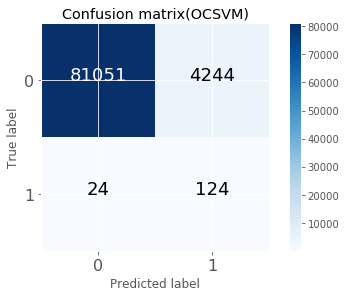

In [12]:
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test Result(OCSVM)')
print('accuracy : ', acc)
print('precsion :', precision)
print('recall : ', recall)

class_names = [0,1]
plot_confusion_matrix(conf_mat , classes=class_names,
                      title='Confusion matrix(OCSVM)')
plt.show()

In [13]:
ocsvm.C

0.0

In [14]:
ocsvm.intercept_

array([-7321.04343184])

In [15]:
ocsvm.decision_function

<bound method OneClassSVM.decision_function of OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.05, shrinking=True, tol=0.001, verbose=False)>

In [16]:
ocsvm.class_weight_

array([], dtype=float64)

In [17]:
ocsvm.dual_coef_

array([[1., 1., 1., ..., 1., 1., 1.]])

In [18]:
ocsvm.fit_status_

0

In [19]:
ocsvm.support_

array([    60,     64,     71, ..., 198983, 199005, 199015])

In [20]:
ocsvm.support_vectors_

array([[0.96697777, 0.7868773 , 0.79190006, ..., 0.41884638, 0.31171433,
        0.06826386],
       [0.92669676, 0.69990783, 0.80993432, ..., 0.41089824, 0.31960325,
        0.73547229],
       [0.80817477, 0.66117974, 0.86094149, ..., 0.4591517 , 0.28531162,
        0.40527388],
       ...,
       [0.98939524, 0.76611729, 0.82163893, ..., 0.41746259, 0.31246031,
        0.        ],
       [0.94882263, 0.73464387, 0.84942175, ..., 0.41491592, 0.31687385,
        0.66590624],
       [0.84100701, 0.84190879, 0.70841568, ..., 0.41620439, 0.32393677,
        0.10819565]])